# **Submission Guidelines:**
1. Submit 1 jupyter notebook containing all the code, results and visualizations and 1 Word document discussing all the results and their comparative analysis.
2. Put these in a zip file named as `22i-7777_Name_BCY-A`
3. Naming convention for the 2 files should be as follows:
    NoteBook: `22i-7777_Name_BCY-A.ipynb` and Report: `22i-7777_Name_BCY-A.docx`.
4. No excuse or resubmission is permissible after the submission deadline.
5. Read the following for report submission guidelines,
    - Your report must contain at least three sections Introduction, Experimentation Explained, Conclusion
    - Your report must contain visual aid to show comparison between the algorithms
    - Font-size: 12, 
    - Font-Family: Times New Roman,
    - Line-Spacing: 1.5pt
6. It is an individual assignment

By following these submission guidelines, you can ensure that your assignment is properly submitted and evaluated. Failure to adhere to these guidelines may result in the deduction of marks or other penalties.
<h4 style='color: red'><br>Deadline: 11:59 PM, 7th-March-2025</h4>

<h1 style='text-align: center'>ASSIGNMENT#02</h1>
<h1 style='text-align: center'>The Quest for a Treasure</h1>
<h2 style='text-align: center'> A comparitive analysis of Informed and Uninformed Searches</h2>

### Background Story
In a magical forest, a brave explorer named Arin sets out on an exciting adventure to find a treasure, hidden inside an ancient temple. The forest is like a giant maze, full of secret paths, magical barriers, and tricky traps.

Arin begins the journey at Campfire Point (S) and must find a way through the maze to reach the Temple (G), facing many challenges along the way.


### Graph Representation of the Forest
The enchanted forest is represented as a graph, where:

<ul>
        <li>Each node represents a location in the forest.</li>
        <li>Each edge represents a valid path.</li>
        <li>Some edges have higher costs due to difficult terrain.</li>
        <li>Portals act as direct jumps between distant nodes, bypassing obstacles.</li>
    </ul>
    
    

  
    
 <h2>Terrain Information</h2>
<p>Each terrain type in the forest has an associated movement cost as follows:</p>

<table border="1">
    <tr>
        <th>Terrain Type</th>
        <th>Marker</th>
        <th>Description</th>
        <th>Cost</th>
        <th>Color</th>
    </tr>
    <tr>
        <td>Normal Path</td>
        <td>0</td>
        <td>Walkable terrain</td>
        <td>1</td>
        <td>Light Gray</td>
    </tr>
    <tr>
        <td>Wall (❌)</td>
        <td>-1</td>
        <td>Impassable obstacle</td>
        <td>∞ (Not allowed)</td>
        <td>White</td>
    </tr>
    <tr>
        <td>Quicksand (⏳)</td>
        <td>2</td>
        <td>Slows movement</td>
        <td>3</td>
        <td>Yellow</td>
    </tr>
    <tr>
        <td>Portal (🔄)</td>
        <td>3</td>
        <td>Instantly moves to exit</td>
        <td>0 (Teleportation)</td>
        <td>Purple</td>
    </tr>
    <tr>
        <td>Wild Beasts (⚠️)</td>
        <td>4</td>
        <td>Dangerous area</td>
        <td>5</td>
        <td>Red</td>
    </tr>
    <tr>
        <td>Start (S)</td>
        <td>5</td>
        <td>Starting position</td>
        <td>0</td>
        <td>Green</td>
    </tr>
    <tr>
        <td>Goal (G)</td>
        <td>6</td>
        <td>Target location</td>
        <td>0</td>
        <td>Blue</td>
    </tr>
</table>


<h2>Task: Finding the Optimal Path</h2>
<p>Your goal is to find the optimal path from S (Campfire Point) to G (Temple of Lumora) using four search strategies.</p>

<h3>Search Strategies to Implement</h3>

You have to implement the following search strategies:
<ul>
    <li>Breadth-First Search (BFS)</li>
    <li>Depth-First Search (DFS)</li>
    <li>Uniform-Cost Search (UCS)</li>
    <li>Greedy Best-First Search (GBFS) (using the most appropriate heuristic)</li>
    <li>A* Search (using the most appropriate heuristic)</li>
</ul>


<h3>Performance Evaluation</h3>
<p>For each search algorithm, track and compare its performance based on the following metrics:</p>
<ul>
    <li> Path found (if any) and its total cost.</li>
    <li> Number of nodes expanded.</li>
    <li> Execution time (using Python’s time module).</li>
    <li> Memory usage (using Python’s psutil or tracemalloc module).</li>
    <li> List of all obstacles faced during the search process.</li>
</ul>

<h3>Visualization Requirements</h3>
<p Generate visualizations to better understand the search performance:</p>
<ul>
    <li>Graph or heatmap of the search process.</li>
    <li>Comparative bar charts showing execution time and memory usage for each algorithm</li>
</ul>

<h3> Hints & Guidelines:</h3>
<ul>
    <li>Use Matplotlib to visualize the paths and performance comparisons.</li>
    <li>Experiment with different heuristics for A* and compare results.</li>
    <li>Use Python’s psutil or tracemalloc module for memory analysis of each algorithm. </li>
</ul>

<h3>Submission Requirements</h3>
<ul>
    <li> Implement the search algorithms in Python.</li>
    <li> Clearly indicate the explored nodes, final path, and total cost.</li>
    <li> Provide visualizations and comparative analysis.</li>
    <li> Discuss the most efficient search strategy based on your findings.</li>
</ul>


In [2]:
#pip install matplotlib


### Importing Necessary Modules/Functions


In [3]:
# Random and numpy array imported
from random import randint
from numpy import array
import tracemalloc
import time

<p style='color: red'>No Changes Should be Made to This Cell</p>

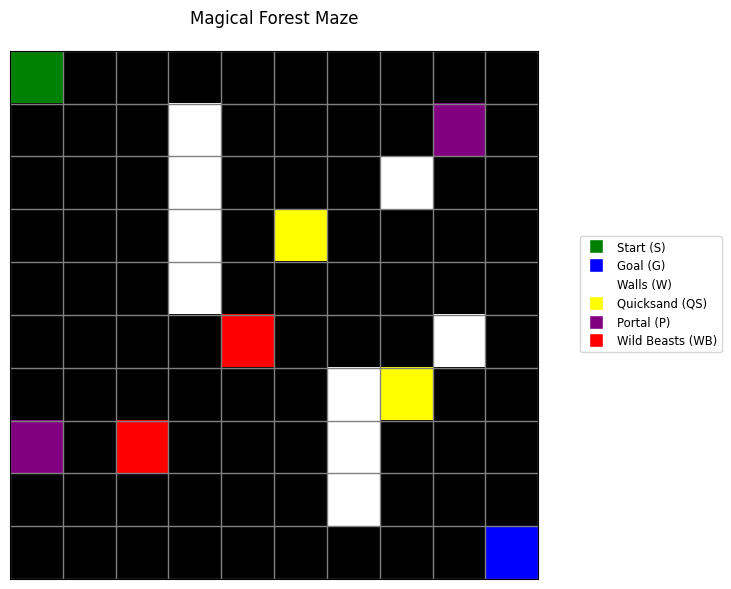

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define grid size
N, M = 10, 10  

# Define symbols
START, GOAL = (0, 0), (9, 9)
WALL, PATH, QUICKSAND, PORTAL, BEAST = -1, 0, 2, 3, 4

# Create an empty grid
grid = np.zeros((N, M))

# Add walls in a controlled manner
walls = [(1, 3), (2, 3), (3, 3), (4, 3), (6, 6), (7, 6), (8, 6), (5, 8), (2, 7)]
for w in walls:
    grid[w] = WALL

# Ensure a clear path by removing unnecessary blockages
clear_path = [(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5)]
for p in clear_path:
    grid[p] = PATH

# Add special terrain strategically
grid[3, 5] = QUICKSAND  # Slower path
grid[6, 7] = QUICKSAND  # Another slow zone
grid[5, 4] = BEAST  # Dangerous zone
grid[7, 2] = BEAST  # Another dangerous area

# Place portals strategically
grid[1, 8] = PORTAL  # Portal entrance
grid[7, 0] = PORTAL  # Portal exit

# Mark start and goal
grid[START] = 5  # Start point
grid[GOAL] = 6  # Goal point

# Define colormap for visualization
cmap = mcolors.ListedColormap(["white", "black", "yellow", "purple", "red", "green", "blue"])
bounds = [-1.5, -0.5, 0.5, 2.5, 3.5, 4.5, 5.5, 6.5]  # Boundaries for colors
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Plot the grid with color representation
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(grid, cmap=cmap, norm=norm, interpolation="nearest")

# Add grid lines and labels
ax.set_xticks(np.arange(N + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(M + 1) - 0.5, minor=True)
ax.grid(which="minor", color="gray", linestyle='-', linewidth=1)
ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

# Add legend outside the plot
legend_patches = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="green", markersize=10, label="Start (S)"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="blue", markersize=10, label="Goal (G)"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="white", markersize=10, label="Walls (W)"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="yellow", markersize=10, label="Quicksand (QS)"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="purple", markersize=10, label="Portal (P)"),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="red", markersize=10, label="Wild Beasts (WB)")
]

fig.legend(handles=legend_patches, loc="center left", fontsize="small", bbox_to_anchor=(1, 0.5))

plt.title("Magical Forest Maze", pad=20)
plt.tight_layout()
plt.show()


## Start Your Work From Here!

<p style='color: green'>You Can Start Writing Code and Make Changes to It from Here and Onwards</p>

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

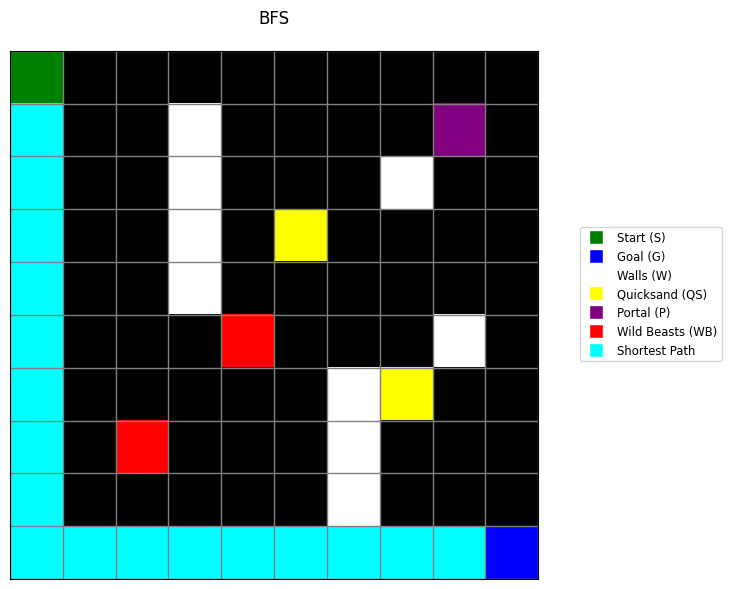

Path Cost: 16
Expanded Nodes: 90
Execution Time: 0.000313 seconds
Memory Used: 16.18 KB
Obstacles: [(1, 3), (2, 3), (2, 7), (3, 3), (4, 3), (5, 8), (6, 6), (7, 6), (8, 6)]


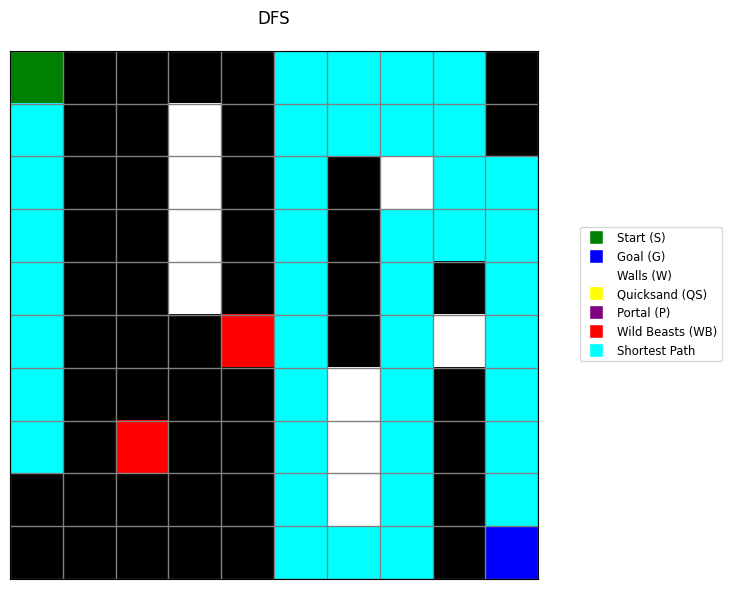

Path Cost: 42
Expanded Nodes: 90
Execution Time: 0.000171 seconds
Memory Used: 15.33 KB
Obstacles: [(1, 3), (2, 3), (2, 7), (3, 3), (4, 3), (5, 8), (6, 6), (7, 6), (8, 6)]


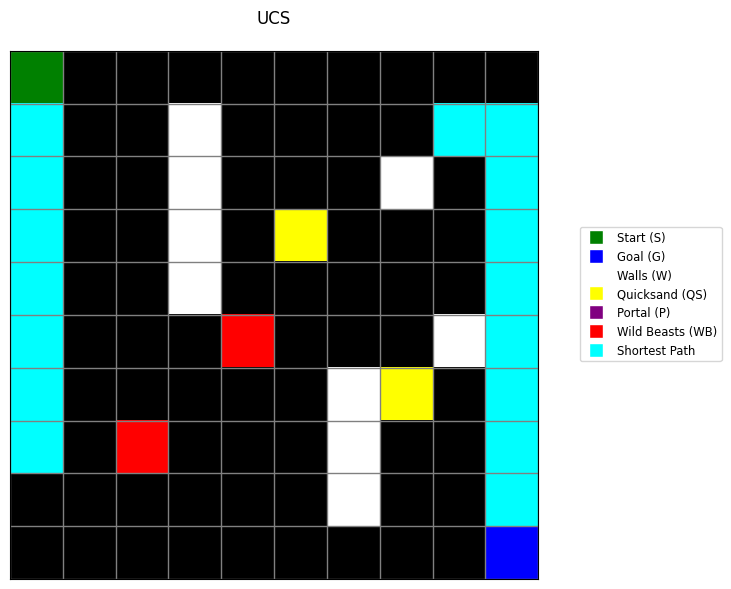

Path Cost: 14
Expanded Nodes: 90
Execution Time: 0.000278 seconds
Memory Used: 12.53 KB
Obstacles: [(1, 3), (2, 3), (2, 7), (3, 3), (4, 3), (5, 8), (6, 6), (7, 6), (8, 6)]


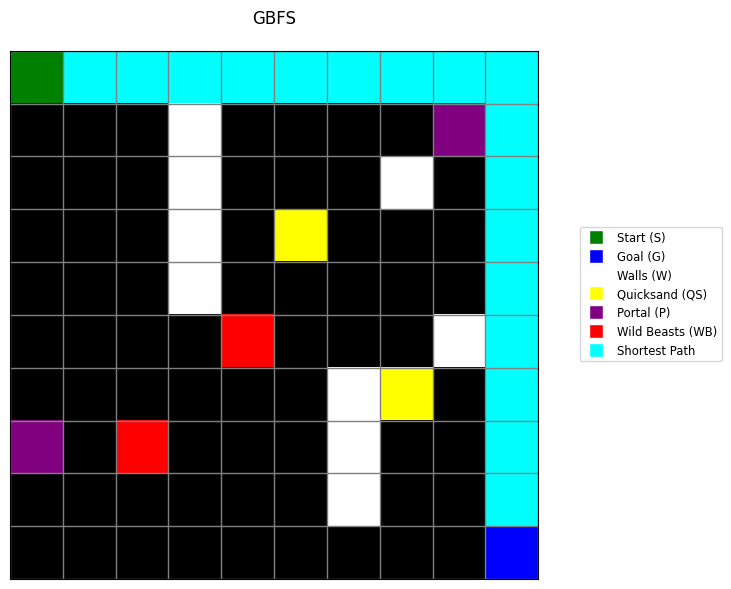

Path Cost: 17
Expanded Nodes: 32
Execution Time: 0.000093 seconds
Memory Used: 2.52 KB
Obstacles: [(1, 3), (2, 3), (2, 7), (3, 3), (4, 3), (5, 8), (6, 6), (7, 6), (8, 6)]


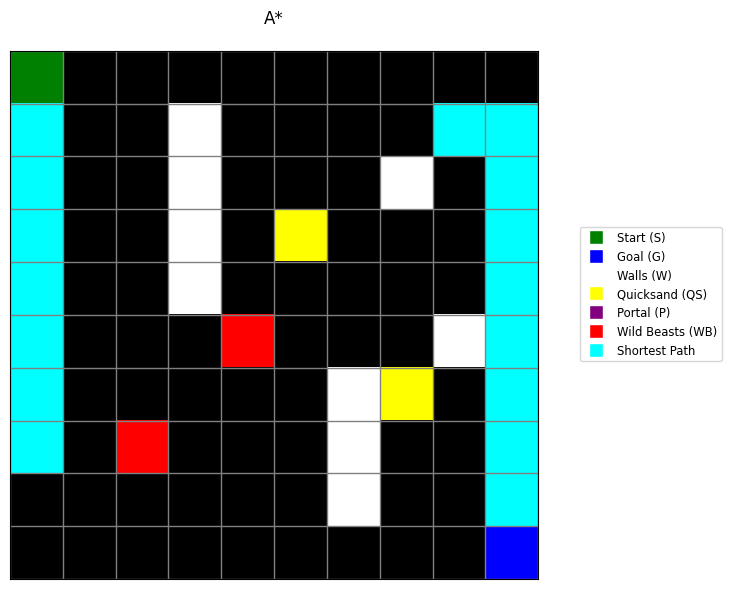

Path Cost: 14
Expanded Nodes: 74
Execution Time: 0.000417 seconds
Memory Used: 9.17 KB
Obstacles: [(1, 3), (2, 3), (2, 7), (3, 3), (4, 3), (5, 8), (6, 6), (7, 6), (8, 6)]


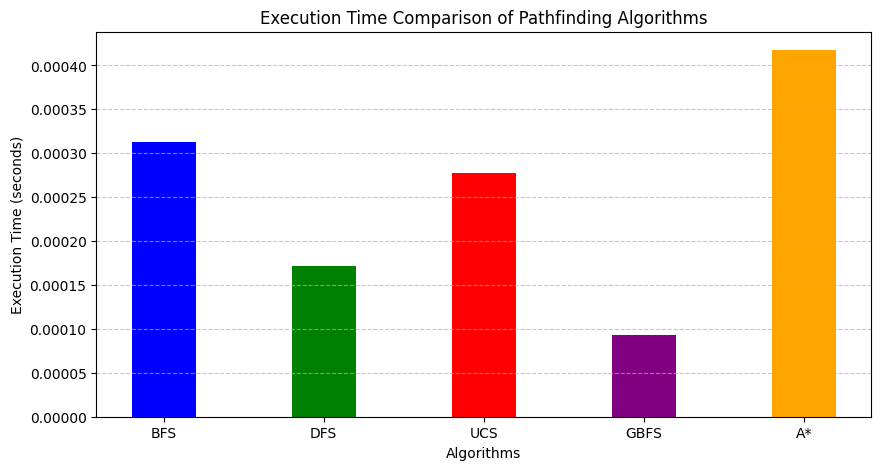

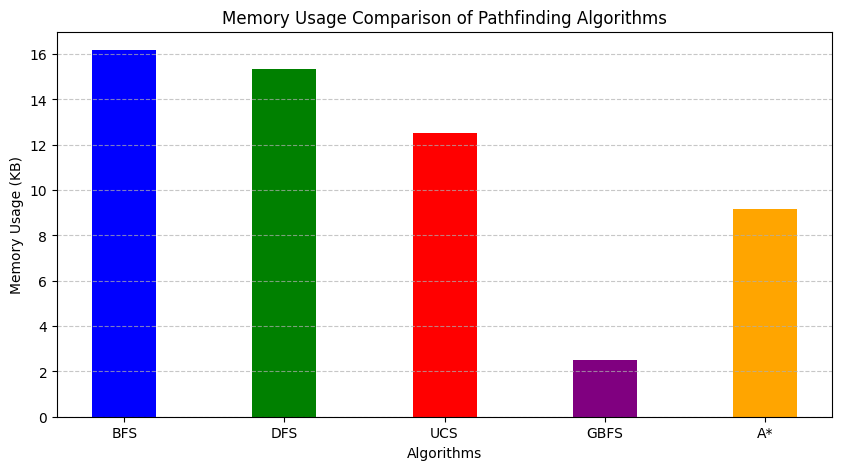

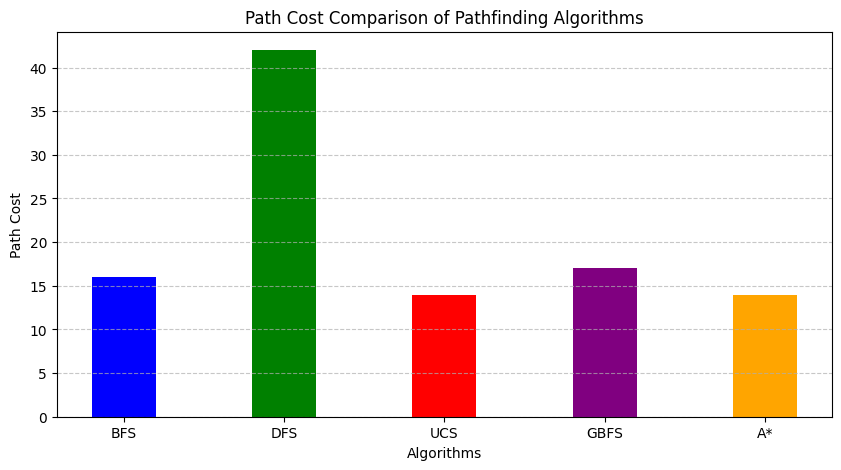

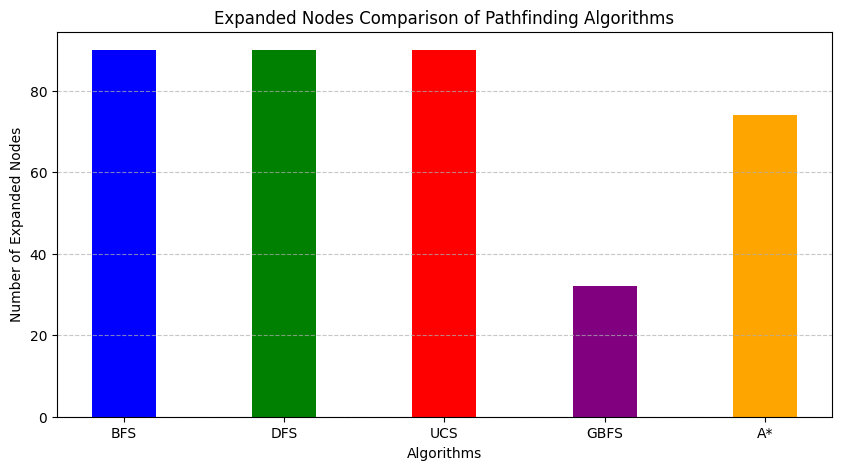

In [5]:
# # print(grid)


def gvn(g, x, y):

    xlen,ylen = grid.shape
    neigh = []

    MOVES = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    for n,m in MOVES:
        if 0 <= x+n < xlen and 0 <= y+m < ylen:
            ter = grid[x+n][y+m]
            if ter == -1:
                continue
            cost = 1 
            if ter == 2:    # Quicksand
                cost = 3
            elif ter == 4:  # Wild Beasts
                cost = 5
            neigh.append((x+n, y+m, cost))

    if grid[x, y] == 3:
        if x == 7 and y == 0:
            neigh.append((1,8,0))
        if x == 1 and y == 8 :
            neigh.append((7,0,0))

    return neigh




# print(gvn(grid,7,8))

def build_graph(grid):

    N, M = grid.shape  
    graph = {} 

    for x in range(N):
        for y in range(M):
            if grid[x, y] != -1:
                graph[(x, y)] = gvn(grid, x, y)

    return graph

gr = build_graph(grid)

# print(gr)


def reconstruct_path(previous_nodes, start, goal):
    path = []
    current = goal

    while current in previous_nodes:  
        path.append(current)
        current = previous_nodes[current]

    path.append(start)  
    path.reverse() 

    return path  


def visualize_path(grid, path,title):

    # Define colormap for visualization
    cmap = mcolors.ListedColormap(["white", "black", "yellow", "purple", "red", "green", "blue", "cyan"])
    bounds = [-1.5, -0.5, 0.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]  # Boundaries for colors
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Copy grid to avoid modifying the original
    grid_copy = grid.copy()

    # Mark the shortest path with a unique color (cyan)
    for x, y in path:
        if (x, y) != START and (x, y) != GOAL:  # Don't overwrite start or goal
            grid_copy[x, y] = 7  # Assign a new color for the path

    # Plot the grid
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(grid_copy, cmap=cmap, norm=norm, interpolation="nearest")

    # Add grid lines
    ax.set_xticks(np.arange(grid.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(grid.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="gray", linestyle='-', linewidth=1)
    ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

    # Add legend
    legend_patches = [
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="green", markersize=10, label="Start (S)"),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="blue", markersize=10, label="Goal (G)"),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="white", markersize=10, label="Walls (W)"),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="yellow", markersize=10, label="Quicksand (QS)"),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="purple", markersize=10, label="Portal (P)"),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="red", markersize=10, label="Wild Beasts (WB)"),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor="cyan", markersize=10, label="Shortest Path")
    ]

    fig.legend(handles=legend_patches, loc="center left", fontsize="small", bbox_to_anchor=(1, 0.5))

    plt.title(title, pad=20)
    plt.tight_layout()
    plt.show()


# path = reconstruct_path(previous_nodes,(0,0),(9,9))

# visualize_path(grid,path)


from collections import deque
import heapq

def bfs(graph, start, goal):
    queue = deque([start])
    visited = set()
    previous_nodes = {}

    while queue:
        current = queue.popleft()
        if current == goal:
            break
        
        if current in visited:
            continue
        visited.add(current)
        
        for neighbor, ny, _ in graph[current]:
            if (neighbor, ny) not in visited:
                queue.append((neighbor, ny))
                previous_nodes[(neighbor, ny)] = current
    
    return previous_nodes

def dfs(graph, start, goal):
    stack = [start]
    visited = set()
    previous_nodes = {}

    while stack:
        current = stack.pop()
        if current == goal:
            break
        
        if current in visited:
            continue
        visited.add(current)
        
        for neighbor, ny, _ in graph[current]:
            if (neighbor, ny) not in visited:
                stack.append((neighbor, ny))
                previous_nodes[(neighbor, ny)] = current
    
    return previous_nodes

def ucs(graph, start, goal):
    pq = []
    heapq.heappush(pq, (0, start))
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {}

    while pq:
        current_cost, current = heapq.heappop(pq)
        if current == goal:
            break
        
        for neighbor, ny, move_cost in graph[current]:
            new_cost = current_cost + move_cost
            if new_cost < distances[(neighbor, ny)]:
                distances[(neighbor, ny)] = new_cost
                heapq.heappush(pq, (new_cost, (neighbor, ny)))
                previous_nodes[(neighbor, ny)] = current
    
    return previous_nodes


def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def gbfs(graph, start, goal):
    pq = []
    heapq.heappush(pq, (heuristic(start, goal), start))
    visited = set()
    previous_nodes = {}

    while pq:
        _, current = heapq.heappop(pq)
        if current == goal:
            break
        
        if current in visited:
            continue
        visited.add(current)
        
        for neighbor, ny, _ in graph[current]:
            if (neighbor, ny) not in visited:
                heapq.heappush(pq, (heuristic((neighbor, ny), goal), (neighbor, ny)))
                previous_nodes[(neighbor, ny)] = current
    
    return previous_nodes

def astar(graph, start, goal):
    pq = []
    heapq.heappush(pq, (0, start))
    g_cost = {node: float('inf') for node in graph}
    g_cost[start] = 0
    previous_nodes = {}

    while pq:
        current_cost, current = heapq.heappop(pq)
        if current == goal:
            break
        
        for neighbor, ny, move_cost in graph[current]:
            new_g_cost = g_cost[current] + move_cost
            f_cost = new_g_cost + heuristic((neighbor, ny), goal)
            if new_g_cost < g_cost[(neighbor, ny)]:
                g_cost[(neighbor, ny)] = new_g_cost
                heapq.heappush(pq, (f_cost, (neighbor, ny)))
                previous_nodes[(neighbor, ny)] = current
    
    return previous_nodes


def eval(gr,name):
    tracemalloc.start()  # Start memory tracking
    start_time = time.time()
    if name == "BFS":
        previous_nodes1 = bfs(gr,(0,0),(9,9))
    elif name == "DFS":
        previous_nodes1 = dfs(gr,(0,0),(9,9))
    elif name == "UCS":
        previous_nodes1 = ucs(gr,(0,0),(9,9))
    elif name == "GBFS":
        previous_nodes1 = gbfs(gr,(0,0),(9,9))
    elif name == "A*":
        previous_nodes1 = astar(gr,(0,0),(9,9))
    end_time = time.time()
    memory_used1 = tracemalloc.get_traced_memory()[1]  # Peak memory usage
    tracemalloc.stop()

    executiontime1 = end_time - start_time

    terrain_costs = {
    0: 1,  # Normal Path
    -1: float('inf'),  # Wall (Impassable)
    2: 3,  # Quicksand
    3: 0,  # Portal (Teleportation)
    4: 5,  # Wild Beasts
    5: 0,  # Start
    6: 0   # Goal
    }

    path1 = reconstruct_path(previous_nodes1,(0,0),(9,9))
    path_cost1 = sum(terrain_costs[grid[x][y]] for x, y in path1 if grid[x][y] in terrain_costs) if path1 else float('inf')
    expanded_nodes1 = len(previous_nodes1)
    obstacles1 = [(x, y) for x in range(grid.shape[0]) for y in range(grid.shape[1]) if grid[x, y] == -1]
    visualize_path(grid,path1,name)

    print(f"Path Cost: {path_cost1}")
    print(f"Expanded Nodes: {expanded_nodes1}")
    print(f"Execution Time: {executiontime1:.6f} seconds")
    print(f"Memory Used: {memory_used1 / 1024:.2f} KB")  # Convert bytes to KB
    print(f"Obstacles: {obstacles1}")
    return path_cost1,expanded_nodes1,executiontime1,memory_used1,obstacles1


path_cost1, expanded_nodes1, executiontime1, memory_used1, obstacles1 = eval(gr, "BFS")
path_cost2, expanded_nodes2, executiontime2, memory_used2, obstacles2 = eval(gr, "DFS")
path_cost3, expanded_nodes3, executiontime3, memory_used3, obstacles3 = eval(gr, "UCS")
path_cost4, expanded_nodes4, executiontime4, memory_used4, obstacles4 = eval(gr, "GBFS")
path_cost5, expanded_nodes5, executiontime5, memory_used5, obstacles5 = eval(gr, "A*")

# Define algorithm names
algorithms = ["BFS", "DFS", "UCS", "GBFS", "A*"]

# Data for each metric
execution_times = [executiontime1, executiontime2, executiontime3, executiontime4, executiontime5]
memory_usages = [memory_used1 / 1024, memory_used2 / 1024, memory_used3 / 1024, memory_used4 / 1024, memory_used5 / 1024]
path_costs = [path_cost1, path_cost2, path_cost3, path_cost4, path_cost5]
expanded_nodes = [expanded_nodes1, expanded_nodes2, expanded_nodes3, expanded_nodes4, expanded_nodes5]

# Define bar width and x-axis positions
bar_width = 0.4
x_indexes = np.arange(len(algorithms))

# Function to create bar charts
def plot_bar_chart(values, title, ylabel, colors):
    plt.figure(figsize=(10, 5))
    plt.bar(x_indexes, values, width=bar_width, color=colors)
    plt.xlabel("Algorithms")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(ticks=x_indexes, labels=algorithms)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Execution Time Chart
plot_bar_chart(execution_times, "Execution Time Comparison of Pathfinding Algorithms", "Execution Time (seconds)", ['blue', 'green', 'red', 'purple', 'orange'])

# Memory Usage Chart
plot_bar_chart(memory_usages, "Memory Usage Comparison of Pathfinding Algorithms", "Memory Usage (KB)", ['blue', 'green', 'red', 'purple', 'orange'])

# Path Cost Chart
plot_bar_chart(path_costs, "Path Cost Comparison of Pathfinding Algorithms", "Path Cost", ['blue', 'green', 'red', 'purple', 'orange'])

# Expanded Nodes Chart
plot_bar_chart(expanded_nodes, "Expanded Nodes Comparison of Pathfinding Algorithms", "Number of Expanded Nodes", ['blue', 'green', 'red', 'purple', 'orange'])








<hr style="height:1px;border:none;color:#333;background-color:#333;" />